In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from multiprocessing import Pool
from PIL import Image
import io
from typing import List, Callable

## Defining Potential Landscape Function

We start with the Muller-Brown potential, which is a two-dimensional potential energy surface that is commonly used to test optimization algorithms. The potential energy surface is given by the following equation:

$$
V(x, y) = \sum_{i=1}^{4} A_i \exp(a_i(x - x_i)^2 + b_i(x - x_i)(y - y_i) + c_i(y - y_i)^2)
$$

where $A_i$, $a_i$, $b_i$, $c_i$, $x_i$, and $y_i$ are constants. The Muller-Brown potential has four local minima and one global minimum. The global minimum is located at $(0.0898, -0.7126)$ and has a potential energy of $-165.0$.

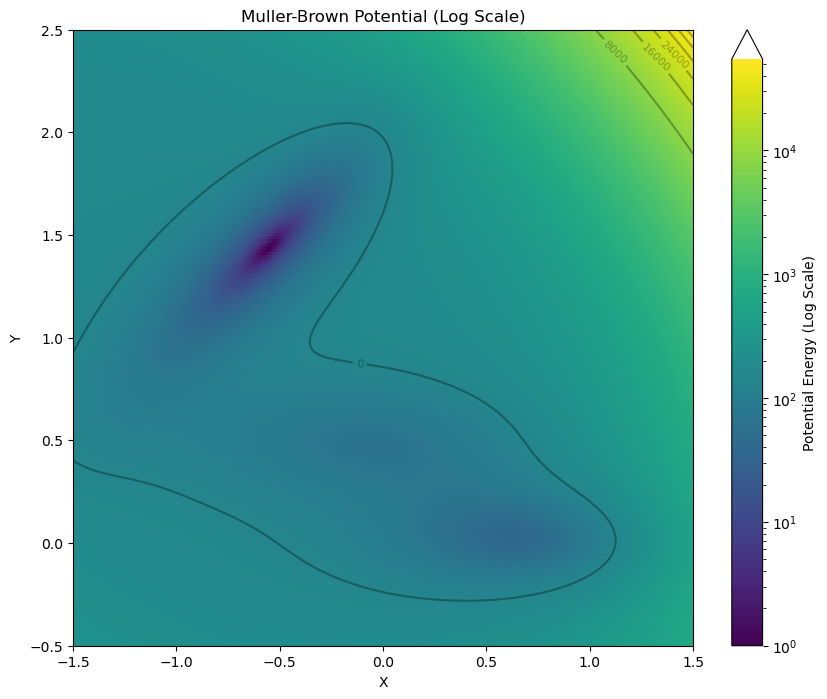

In [2]:
import numpy as np

def muller_brown_potential(x, y):
    A = [-200, -100, -170, 15]
    a = [-1, -1, -6.5, 0.7]
    b = [0, 0, 11, 0.6]
    c = [-10, -10, -6.5, 0.7]
    x0 = [1, 0, -0.5, -1]
    y0 = [0, 0.5, 1.5, 1]

    z = 0
    for i in range(4):
        z += A[i] * np.exp(a[i]*(x-x0[i])**2 + b[i]*(x-x0[i])*(y-y0[i]) + c[i]*(y-y0[i])**2)
    return z

def plot_muller_brown_potential_3d(resolution=100, view_angle=(30, 45)):
    x = np.linspace(-2, 2, resolution)
    y = np.linspace(-1, 3, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = muller_brown_potential(X[i, j], Y[i, j])

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Potential Energy')
    ax.set_title('Muller-Brown Potential')
    
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    ax.view_init(elev=view_angle[0], azim=view_angle[1])
    
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_muller_brown_potential_2d(resolution=200, show_contours=True):
    """
    Create a 2D contour plot of the Muller-Brown potential with a logarithmic colorbar.
    
    Parameters:
    resolution : int, optional
        Number of points along each axis (default is 200)
    show_contours : bool, optional
        Whether to show contour lines (default is True)
    """
    x = np.linspace(-1.5, 1.5, resolution)
    y = np.linspace(-0.5, 2.5, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = muller_brown_potential(X[i, j], Y[i, j])

    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Shift the potential to ensure all values are positive
    Z_shifted = Z - Z.min() + 1  # Add 1 to avoid log(0)
    
    # Cap the values at 700
    # Z_capped = np.minimum(Z_shifted, 700)
    
    # Create a custom colormap with white for values above 700
    cmap = plt.get_cmap('viridis').copy()
    cmap.set_over('white')

    # Use LogNorm for logarithmic scale
    norm = colors.LogNorm()

    im = ax.imshow(Z_shifted, extent=[-1.5, 1.5, -0.5, 2.5], origin='lower', 
                   cmap=cmap, norm=norm, aspect='auto')
    
    # Add contour lines if requested
    if show_contours:
        contours = ax.contour(X, Y, Z, colors='k', alpha=0.3)
        ax.clabel(contours, inline=True, fontsize=8)
    
    # Customize the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Muller-Brown Potential (Log Scale)')
    
    # Add a color bar
    cbar = fig.colorbar(im, extend='max')
    cbar.set_label('Potential Energy (Log Scale)')
    
    plt.show()

# Example usage:
plot_muller_brown_potential_2d(resolution=200, show_contours=True)


# Example usage:
# plot_muller_brown_potential_3d(resolution=200, view_angle=(90, 0))


In [3]:
def plot_2d_potential(potential_func, x_range, y_range, resolution=200, show_contours=True, 
                      log_scale=True, cmap='viridis', title='2D Potential'):
    """
    Create a 2D contour plot of a given potential function.
    
    Parameters:
    potential_func : callable
        The potential function to plot. Should take two arguments (x, y).
    x_range : tuple
        The range of x values as (min_x, max_x).
    y_range : tuple
        The range of y values as (min_y, max_y).
    resolution : int, optional
        Number of points along each axis (default is 200).
    show_contours : bool, optional
        Whether to show contour lines (default is True).
    log_scale : bool, optional
        Whether to use a logarithmic color scale (default is True).
    cmap : str, optional
        The colormap to use (default is 'viridis').
    title : str, optional
        The title of the plot (default is '2D Potential').
    """
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = potential_func(X, Y)

    fig, ax = plt.subplots(figsize=(10, 8))
    
    if log_scale:
        # Shift the potential to ensure all values are positive
        Z_shifted = Z - Z.min() + 50  # Add a small value to avoid log(0)
        norm = colors.LogNorm()
    else:
        Z_shifted = Z
        norm = colors.Normalize()

    # Create a custom colormap with white for values above the maximum
    custom_cmap = plt.get_cmap(cmap).copy()
    custom_cmap.set_over('white')

    im = ax.imshow(Z_shifted, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], 
                   origin='lower', cmap=custom_cmap, norm=norm, aspect='auto')
    
    # Add contour lines if requested
    if show_contours:
        contours = ax.contour(X, Y, Z, colors='k', alpha=0.3)
        ax.clabel(contours, inline=True, fontsize=8)
    
    # Customize the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    
    # Add a color bar
    cbar = fig.colorbar(im, extend='max')
    cbar.set_label('Potential Energy' + (' (Log Scale)' if log_scale else ''))
    
    plt.show()

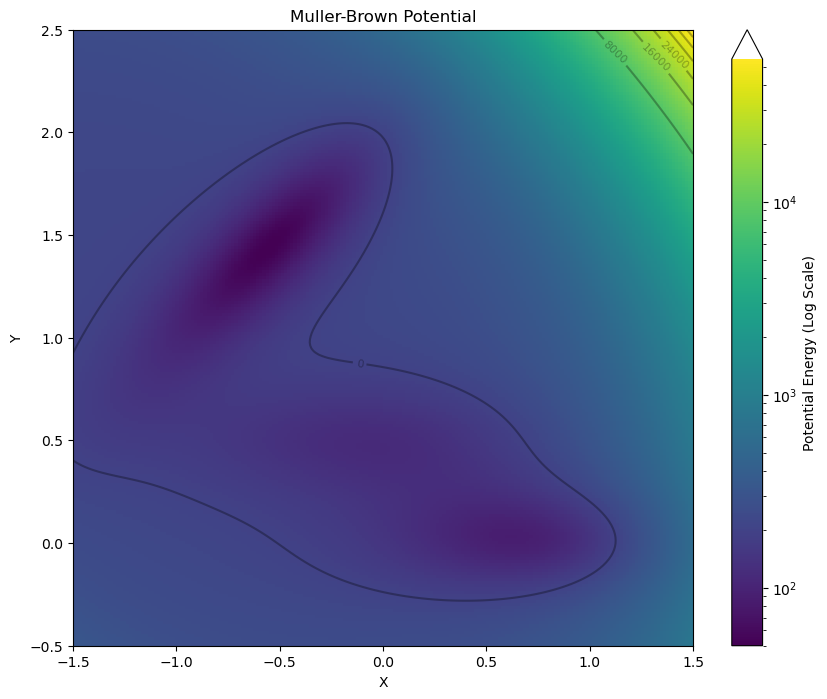

In [4]:
plot_2d_potential(muller_brown_potential, 
                  x_range=(-1.5, 1.5), 
                  y_range=(-0.5, 2.5), 
                  title='Muller-Brown Potential')

## Define the Bias Functions

In [5]:
import numpy as np
from typing import List, Callable

def create_n_dimensional_windows(dimensions: int, min_values: List[float], max_values: List[float], Nwindows: int) -> tuple:
    """
    Create n-dimensional windows for sampling.

    Args:
    dimensions (int): Number of dimensions
    min_values (List[float]): Minimum values for each dimension
    max_values (List[float]): Maximum values for each dimension
    Nwindows (int): Number of windows per dimension

    Returns:
    tuple: (centers, dx)
    """
    centers = []
    dx = []
    for dim in range(dimensions):
        min_x, max_x = min_values[dim], max_values[dim]
        dx_dim = (max_x - min_x) / Nwindows
        centers_dim = np.linspace(min_x + dx_dim/2, max_x - dx_dim/2, Nwindows)
        centers.append(centers_dim)
        dx.append(dx_dim)
    return np.array(centers), np.array(dx)

class PsiFunction:
    def __init__(self, center: np.ndarray, k: float):
        self.center = center
        self.k = k

    def __call__(self, *args):
        pos = np.stack(args, axis=-1)  # Stack inputs along the last axis
        return 0.5 * self.k * np.sum((pos - self.center)**2, axis=-1)

def create_biases(centers: np.ndarray, k: float) -> np.ndarray:
    """
    Create bias functions for n-dimensional windows and return them as an n-dimensional array.

    Args:
    centers (np.ndarray): Centers of the windows, shape (dimensions, Nwindows)
    k (float): Spring constant for the bias functions

    Returns:
    np.ndarray: n-dimensional array of bias functions, shape ([Nwindows] * dimensions)
    """
    dimensions, Nwindows = centers.shape
    bias_functions = np.empty([Nwindows] * dimensions, dtype=object)  # Create an n-dimensional array

    for i in range(Nwindows**dimensions):
        indices = np.unravel_index(i, [Nwindows] * dimensions)
        center = np.array([centers[d][idx] for d, idx in enumerate(indices)])
        bias_functions[indices] = PsiFunction(center, k)

    return bias_functions

In [6]:
Nwindows = 50
k = 2500

x_range=(-1.5, 1.5)
y_range=(-0.5, 2.5)

centers = np.zeros((2, Nwindows))
centers[0] = np.linspace(*x_range, Nwindows)
centers[1] = np.linspace(*y_range, Nwindows)

bias_functions = create_biases(centers, k)

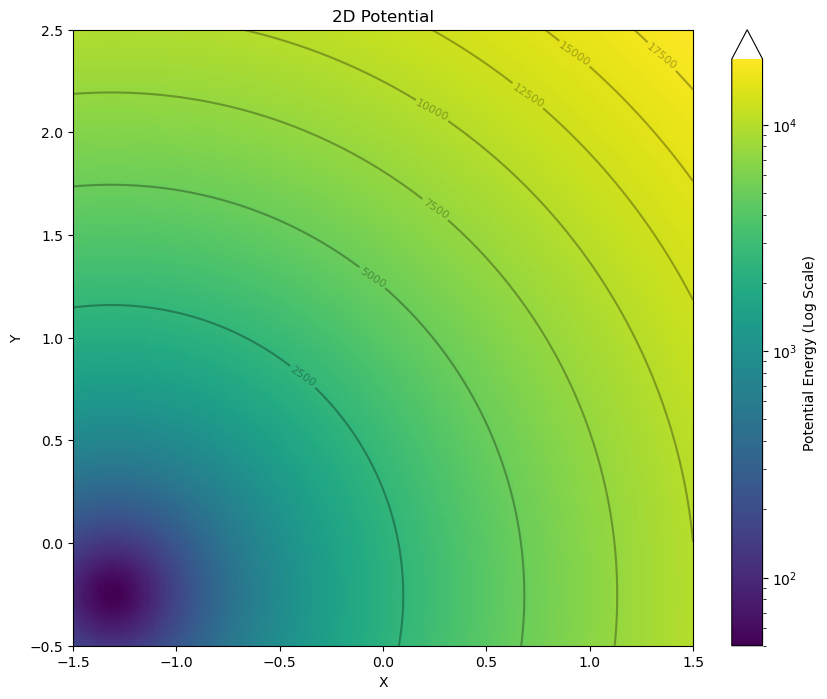

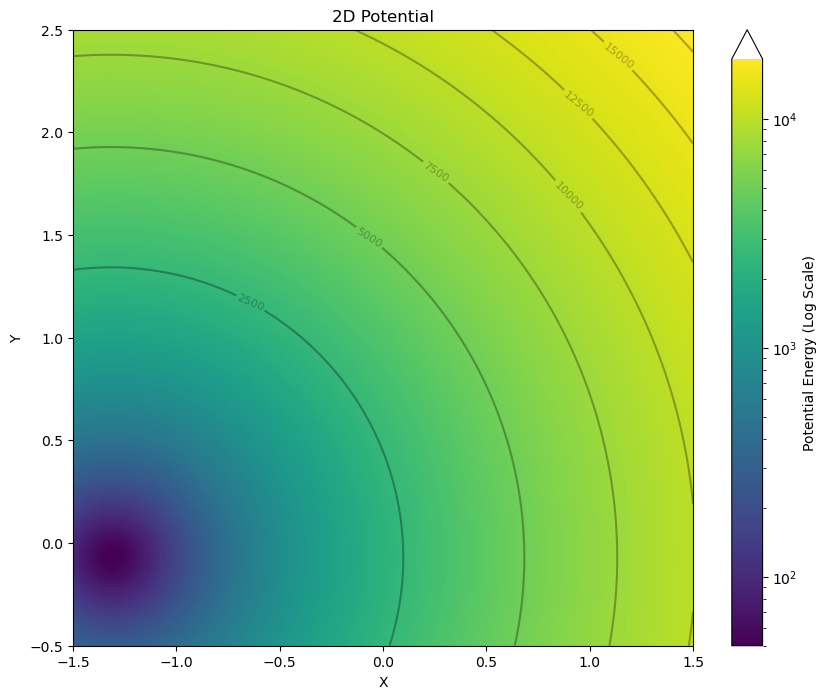

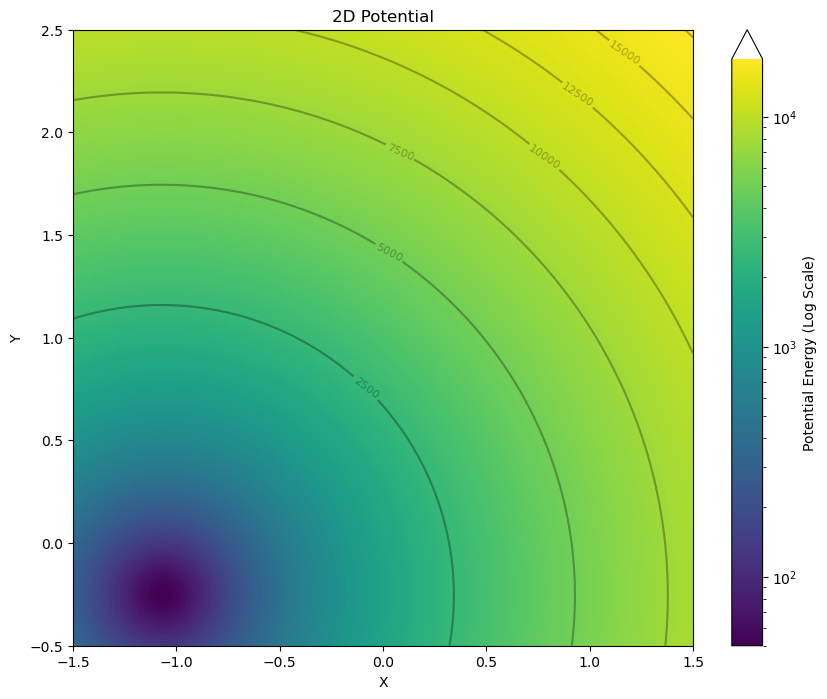

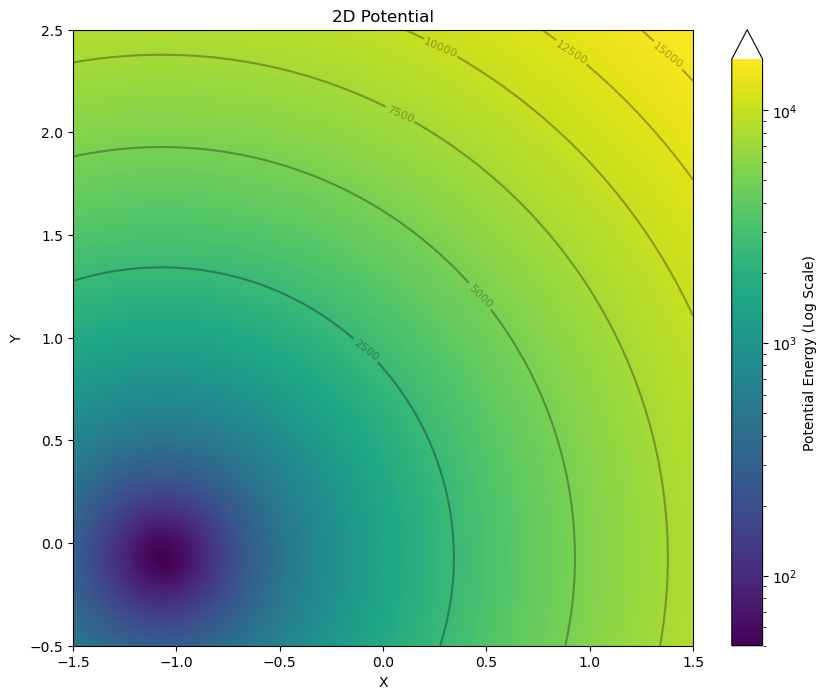

In [7]:
for i in (3, 7):
    for j in (4, 7):
        plot_2d_potential(
            bias_functions[i][j],
            x_range,
            y_range
        )

# Monte Carlo in $n$ Dimensions

In [8]:
def monte_carlo_sampling_per_window(bias: Callable, V: Callable, dimensions: int, minima: List[int], maxima: List[int], nSweeps: int, beta: int, dispSize: int):
    """
    Perform Monte Carlo sampling of the biased distribution for a given window.

    Args:
        bias (callable): The bias function for this window
        V (callable): The landscape function V(x)
        dimensions (int): Number of dimensions
        minima (List[int]): Minimum range to consider in each dimension
        maxima (List[int]): Maximum range to consider in each dimension
        nSweeps (int): Number of iterations to run
        beta (int): Inverse thermal energy
        dispSize (int): Displacement size to consider in each direction

    Returns:
        numpy.ndarray: The samples drawn from the biased distribution.
    """

    samples = np.zeros((nSweeps, dimensions))

    # Pick a random starting point in the window and get potential energy
    current_pos = np.array([np.random.uniform(minima[i], maxima[i]) for i in range(dimensions)])
    
    current_U = V(*current_pos) + bias(*current_pos)

    for sweep in range(nSweeps):
        # Propose a new position
        proposed_pos = current_pos + dispSize * np.random.uniform(-1, 1, dimensions)

        proposed_U = V(*proposed_pos) + bias(*proposed_pos)

        # Acceptance criterion
        delta_U = proposed_U - current_U
        acceptance_prob = min(1, np.exp(-beta * delta_U))

        # Accept or reject
        if np.random.random() < acceptance_prob:
            current_pos = proposed_pos
            current_U = proposed_U

        samples[sweep] = current_pos
    
    return samples

def monte_carlo_sampling(biases: np.ndarray, V: Callable, dimensions: int, minima: List[float], maxima: List[float], 
                         nWindows: int, nSweeps: int, beta: float, dispSize: float) -> np.ndarray:
    """
    Perform Monte Carlo sampling of the biased distribution for all windows in n dimensions.

    Args:
    biases (np.ndarray): An n-dimensional array of bias functions for each window.
    V (Callable): The landscape function V(x).
    dimensions (int): Number of dimensions.
    minima (List[float]): Global minimum range to consider in each dimension.
    maxima (List[float]): Global maximum range to consider in each dimension.
    nWindows (int): Number of windows per dimension.
    nSweeps (int): Number of iterations to run per window.
    beta (float): Inverse thermal energy.
    dispSize (float): Displacement size to consider in each direction.

    Returns:
    numpy.ndarray: The samples drawn from the biased distribution for all windows.
    """
    # Initialize an n-dimensional array to store samples for each window
    all_samples = np.empty([nWindows] * dimensions, dtype=object)

    # Calculate the size of each window in each dimension
    window_sizes = [(maxima[i] - minima[i]) / nWindows for i in range(dimensions)]

    # Iterate over all combinations of windows in n dimensions
    for index in np.ndindex(*([nWindows] * dimensions)):  # Iterate over all grid points in the n-dimensional space
        # Calculate the minima and maxima for this specific window
        window_minima = [minima[d] + index[d] * window_sizes[d] for d in range(dimensions)]
        window_maxima = [min(window_minima[d] + window_sizes[d], maxima[d]) for d in range(dimensions)]

        # Perform Monte Carlo sampling for this window
        window_samples = monte_carlo_sampling_per_window(
            bias=biases[index],  # Access the correct bias function from the n-dimensional array
            V=V,
            dimensions=dimensions,
            minima=window_minima,
            maxima=window_maxima,
            nSweeps=nSweeps,
            beta=beta,
            dispSize=dispSize
        )

        # Store the samples in the corresponding position in the n-dimensional array
        all_samples[index] = window_samples

    return all_samples

In [9]:
T = 298 # K
kB = 1.38064852e-2 # Boltzmann constant (zJ/K)
beta = 1 / (kB * T)
printModulus = 10 # frequency of prints to screen
writeModulus = 10  # frequency of writes to file
dispSize = 0.05
nSweeps = 100 # number of MC sweeps
dimensions = 2

mimima = [x_range[0], y_range[0]]
maxima = [x_range[1], y_range[1]]

In [10]:
samples = monte_carlo_sampling(bias_functions, muller_brown_potential, dimensions, mimima, maxima, Nwindows, nSweeps, beta, dispSize)

/var/folders/gf/rqrz_xpd00b34c0v2n9m1q1m0000gn/T/ipykernel_50019/1696592127.py:34: RuntimeWarning: overflow encountered in exp
  acceptance_prob = min(1, np.exp(-beta * delta_U))


In [11]:
def plot_sample_distribution(samples, x_range, y_range, resolution=100, title="Sample Distribution"):
    """
    Plot the distribution of samples as a heatmap.

    Args:
    samples (np.ndarray): The array of samples with shape (nSweeps, dimensions).
    x_range (tuple): The range of x values as (min_x, max_x).
    y_range (tuple): The range of y values as (min_y, max_y).
    resolution (int): The resolution of the heatmap grid.
    title (str): Title for the plot.
    """
    # Extract x and y samples
    x_samples = samples[:, 0]
    y_samples = samples[:, 1]

    # Create a 2D histogram
    heatmap, xedges, yedges = np.histogram2d(
        x_samples, y_samples, bins=resolution, range=[x_range, y_range]
    )

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(8, 6))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = ax.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
    
    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Sample Density')
    
    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    plt.show()

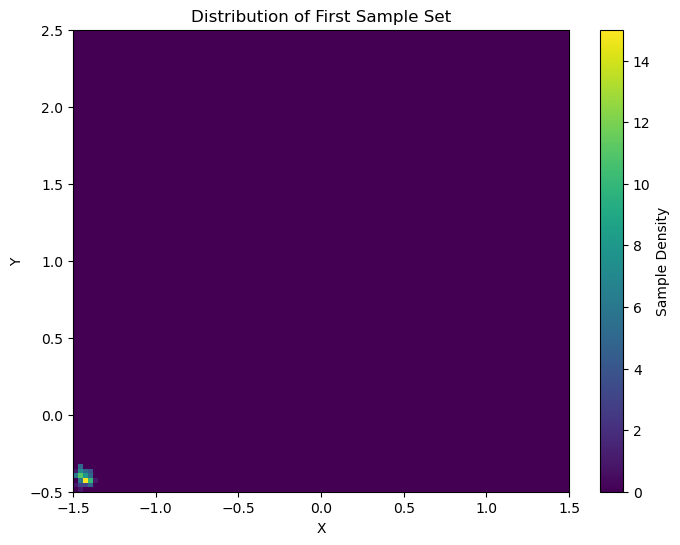

In [12]:
# Extract the very first sample set
first_sample_set = samples[0][0]  # Shape: (nSweeps, 2)

# Plot the distribution
plot_sample_distribution(
    first_sample_set,
    x_range=x_range,
    y_range=y_range,
    title="Distribution of First Sample Set"
)

In [ ]:
def create_heatmap_frame(samples, x_range, y_range, resolution=100, title="Sample Distribution", vmin=None, vmax=None):
    """
    Create a heatmap frame for the given samples with standardized color scale.

    Args:
    samples (np.ndarray): The array of samples with shape (nSweeps, dimensions).
    x_range (tuple): The range of x values as (min_x, max_x).
    y_range (tuple): The range of y values as (min_y, max_y).
    resolution (int): The resolution of the heatmap grid.
    title (str): Title for the plot.
    vmin (float): Minimum value for color scale.
    vmax (float): Maximum value for color scale.

    Returns:
    PIL.Image: The heatmap frame as an image.
    """
    x_samples = samples[:, 0]
    y_samples = samples[:, 1]

    heatmap, xedges, yedges = np.histogram2d(
        x_samples, y_samples, bins=resolution, range=[x_range, y_range]
    )

    fig, ax = plt.subplots(figsize=(8, 6))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = ax.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    
    cbar = plt.colorbar(im)
    cbar.set_label('Sample Density')
    
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close(fig)
    
    return Image.open(buf)

# First, calculate the global min and max sample densities
global_min = float('inf')
global_max = float('-inf')
resolution = 100

for index in np.ndindex(*([Nwindows] * dimensions)):
    current_samples = samples[index]
    heatmap, _, _ = np.histogram2d(
        current_samples[:, 0], current_samples[:, 1], 
        bins=resolution, range=[x_range, y_range]
    )
    global_min = min(global_min, heatmap.min())
    global_max = max(global_max, heatmap.max())

# Now create frames with standardized color scale
frames = []

for index in np.ndindex(*([Nwindows] * dimensions)):
    current_samples = samples[index]
    
    frame = create_heatmap_frame(
        current_samples, 
        x_range, 
        y_range, 
        resolution=resolution, 
        title=f'Sample Distributions',
        vmin=global_min,
        vmax=global_max
    )
    frames.append(frame)

# Save frames as GIF
frames[0].save('sample_distribution_heatmap_animation.gif', 
               save_all=True, 
               append_images=frames[1:], 
               optimize=False, 
               duration=50,  # Duration
               loop=0)